# Pandas Data Frames for Tabular Data

## Hard-coding Data in Rows

Often, each row of your data table corresponds to a single measurement, so you collect one row at a time, and rows are the easiest lists to record.

,x,dx,y,dy
0,0.0,3.0e-02,20.0,1.0
1,0.3,3.0e-02,19.5,0.9
2,0.7,3.0e-02,17.8,0.8
3,1.0,3.0e-02,15.1,0.5
4,1.3,3.0e-02,11.2,0.9
5,1.7,3.0e-02,6.3,0.5
6,2.0,3.0e-02,0.2,0.7


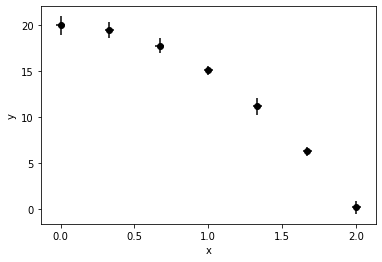

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Hard-code the data as a list of rows in square brackets.
data = [[0,    0.03, 20.0, 1.0],
        [0.33, 0.03, 19.5, 0.9],
        [0.67, 0.03, 17.8, 0.8],
        [1.00, 0.03, 15.1, 0.5],
        [1.33, 0.03, 11.2, 0.9],
        [1.67, 0.03,  6.3, 0.5],
        [2.00, 0.03,  0.2, 0.7]]

df = pd.DataFrame(data, columns=["x", "dx", "y", "dy"])

# Display the data in tabular form.
pd.set_option("display.precision", 1)   # Decimal places to display
display(df)

# Extract columns and plot
xs  = df["x"]
dxs = df["dx"]
ys  = df["y"]
dys = df["dy"]

plt.errorbar(xs, ys, xerr=dxs, yerr=dys, fmt='ko')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Hard-coding Data in Columns

If your data is already in the form of column lists, here's how to load them into a dataframe.

,x,dx,y,dy
0,0.0,3.0e-02,20.0,1.0
1,0.3,3.0e-02,19.5,0.9
2,0.7,3.0e-02,17.8,0.8
3,1.0,3.0e-02,15.1,0.5
4,1.3,3.0e-02,11.2,0.9
5,1.7,3.0e-02,6.3,0.5
6,2.0,3.0e-02,0.2,0.7


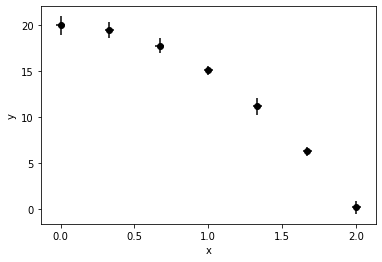

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# It's a good idea to make your lists into numpy arrays if you plan
# to do any calculations with them later.
xs  = np.array([ 0.0, 0.33, 0.67,  1.0, 1.33, 1.67, 2.0])
dxs = np.array([0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03])
ys  = np.array([20.0, 19.5, 17.8, 15.1, 11.2,  6.3, 0.2])
dys = np.array([ 1.0,  0.9,  0.8,  0.5,  0.9,  0.5, 0.7])

df = pd.DataFrame(list(zip(xs, dxs, ys, dys)), columns=["x", "dx", "y", "dy"])

# Display the data in tabular form.
pd.set_option("display.precision", 1)   # Decimal places to display
display(df)

plt.errorbar(xs, ys, xerr=dxs, yerr=dys, fmt='ko')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Reading the Data from a CSV File

The data file must have one row per line with one value for each column. The values must be separated by commas.

*The code below requires that the file `TabularData.csv` be present in the same directory as this notebook file.*

,x,dx,y,dy
0,0.0,3.0e-02,20.0,1.0
1,0.3,3.0e-02,19.5,0.9
2,0.7,3.0e-02,17.8,0.8
3,1.0,3.0e-02,15.1,0.5
4,1.3,3.0e-02,11.2,0.9
5,1.7,3.0e-02,6.3,0.5
6,2.0,3.0e-02,0.2,0.7


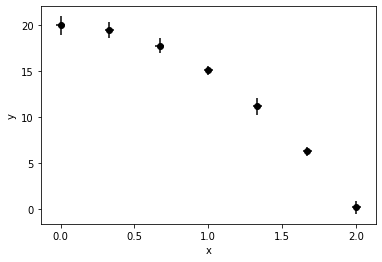

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Put the data in a comma-delimited text file and read it in.
#    Notes: Put column titles in quotes in the CSV file.
#
#           No spaces are allowed between column titles in the CSV file!
#
#           In JupyterLab, right-click on a .csv file and select 
#           Open With -> Editor to edit the file. Otherwise, it will just 
#           display it.
#
df = pd.read_csv("TabularData.csv")

# Display the data in tabular form.
pd.set_option("display.precision", 1)   # Decimal places to display
display(df)

# Extract columns and plot
xs  = df["x"]
dxs = df["dx"]
ys  = df["y"]
dys = df["dy"]

plt.errorbar(xs, ys, xerr=dxs, yerr=dys, fmt='ko')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Adding Columns to an Existing Dataframe

,x,dx,y,dy,slope,dslope
0,0.0,3.0e-02,20.0,1.0,-1.5,-4.1
1,0.3,3.0e-02,19.5,0.9,-5.0,-3.6
2,0.7,3.0e-02,17.8,0.8,-8.2,-3.0
3,1.0,3.0e-02,15.1,0.5,-11.8,-3.5
4,1.3,3.0e-02,11.2,0.9,-14.4,-3.5
5,1.7,3.0e-02,6.3,0.5,-18.5,-3.5
6,2.0,3.0e-02,0.2,0.7,NaN,NaN


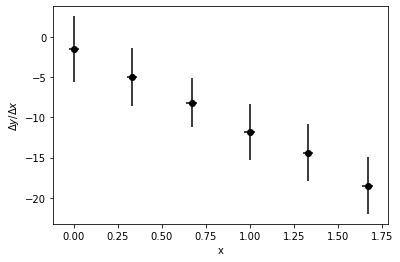

In [4]:
import numpy as np
import pandas as pd

# Calculate average slope values = deltay/deltax
# and propagated uncertainties.
slopes  = []
dslopes = []
for i in range(len(xs)-1):
    slopes.append((ys[i+1] - ys[i])/(xs[i+1] - xs[i]))
    dslopes.append( slopes[i]*np.sqrt((dys[i+1]**2+dys[i]**2)/(ys[i+1]-ys[i])**2 + 
                    (dxs[i+1]**2+dxs[i]**2)/(xs[i+1]-xs[i])**2) )

# We get one fewer slope value than the number of data points, so we need
# to append the value np.nan, which represents 'not a number' to give the
# new column lists the same number of entries as the dataframe.
slopes.append(np.nan)
dslopes.append(np.nan)

# Add the new columns to the dataframe.
df['slope'] = slopes
df['dslope'] = dslopes

pd.set_option("display.precision", 1)   # Decimal places to display
display(df)

plt.errorbar(xs, slopes, xerr=dxs, yerr=dslopes, fmt='ko')
plt.xlabel('x')
plt.ylabel(r'$\Delta y/\Delta x$')

plt.show()